In [1]:
# load structural measures
import pandas as pd
data = pd.read_csv('/data/sliu/updated_ukbb2/raw_data/matched_ukbb.csv')
# total_items = pd.read_csv('/data/sliu/updated_ukbb2/raw_data/total_items.csv')
# s1 = ['karin_IDs']
# for i in range(total_items.shape[0]):
#     s1.append(str(total_items.iloc[i,0])+'-2.0')
regional_items = pd.read_csv('/data/sliu/updated_ukbb2/raw_data/regional_items_no_volumes.csv')
s2 = ['karin_IDs']
for i in range(regional_items.shape[0]):
    s2.append(str(regional_items.iloc[i,0])+'-2.0')

In [2]:
# T_data = data[s1]
# T_data.dropna(axis=0,how='any',inplace=True)
sdata = data[s2]
sdata.dropna(axis=0,how='any',inplace=True)

/data/sliu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [4]:
# load covariates
temp = pd.read_csv('/data/sliu/updated_ukbb/added_used_variables.csv')
s = ['eid','25756-2.0','25757-2.0','25758-2.0']
QC1 = temp[s]
temp2 = pd.read_csv('/data/sliu/muti_PRSs/ukb30545.sample_QC.csv')
s2 = ['eid','age_at_reqruitment','genetic_sex']
QC2 = temp2[s2]
PCs = pd.read_table('/data/sliu/muti_PRSs/UKB.HM3.EUR.100PCs.txt','\t')
PRS_data = pd.read_csv('/data/sliu/updated_ukbb/ukb_PRSs.csv')
s3 = ['karin_IDs','25741-2.0']
motion = data[s3]
motion.dropna(axis=0,how='any',inplace=True)

/data/sliu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: read_table is deprecated, use read_csv instead.
  
/data/sliu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [5]:
# load functional measures
import os
import numpy as np
FC_path = '/data/sliu/updated_ukbb/FC/bulk_25752_updated/'
files = os.listdir(FC_path)
FC_IDs = []
FC_data = np.empty((len(files),210))
for i in range(len(files)):
    f = files[i]
    FC_IDs.append(int(f[:7]))
    try_data = np.loadtxt(os.path.join(FC_path,f))
#     try_data.reshape((1,210))
    FC_data[i,:] = try_data

In [6]:
FC_path = '/data/sliu/updated_ukbb/FC/bulk_25754_updated/'
files = os.listdir(FC_path)
ICV_IDs = []
ICV_data = np.empty((len(files),21))
for i in range(len(files)):
    f = files[i]
    ICV_IDs.append(int(f[:7]))
    try_data = np.loadtxt(os.path.join(FC_path,f))
#     try_data.reshape((1,210))
    ICV_data[i,:] = try_data

In [7]:
fdata1 = pd.DataFrame(data=FC_data)
fdata1['IDs'] = np.array(FC_IDs)
fdata1.set_index('IDs',inplace=True)
# fdata = fdata1
fdata2 = pd.DataFrame(data=ICV_data)
fdata2['IDs'] = np.array(ICV_IDs)
fdata2.set_index('IDs',inplace=True)
ll = list(set(fdata1.index) & set(fdata2.index))
ffdata1 = fdata1.loc[ll]
ffdata2 = fdata2.loc[ll]
fdata = pd.concat([ffdata1,ffdata2],axis=1,join='inner')
fdata.reset_index(inplace=True)
fdata.drop_duplicates(['IDs'],inplace=True)

In [8]:
# matching subject IDs
# T_data.set_index('karin_IDs', inplace=True)
sdata.set_index('karin_IDs', inplace=True)
fdata.set_index('IDs',inplace=True)
motion.set_index('karin_IDs', inplace=True)
QC1.set_index('eid',inplace=True)
QC2.set_index('eid',inplace=True)
PCs.set_index('IID',inplace=True)
PRS_data.set_index('FID',inplace=True)
l = list(set(fdata.index) & set(sdata.index) & set(QC1.index) & set(QC2.index) & set(motion.index)\
         & set(PCs.index) & set(PRS_data.index))
final_FCs = fdata.loc[l]
final_vols = sdata.loc[l]
final_QC1 = QC1.loc[l]
final_QC2 = QC2.loc[l]
final_PCs = PCs.loc[l]
final_motion = motion.loc[l]
final_PRSs = PRS_data.loc[l]
# final_Ts = T_data.loc[l]

final_FCs.reset_index(inplace=True)
final_vols.reset_index(inplace=True)
final_QC1.reset_index(inplace=True)
final_QC2.reset_index(inplace=True)
final_PCs.reset_index(inplace=True)
final_motion.reset_index(inplace=True)
final_PRSs.reset_index(inplace=True)
# final_Ts.reset_index(inplace=True)

In [9]:
# merge covariates
PCs_25 = final_PCs.iloc[:,2:27].values
age = final_QC2.iloc[:,1:2].values
sex = final_QC2.iloc[:,2:3].values
motion = final_motion.iloc[:,1:2].values
postions = final_QC1.iloc[:,1:4].values
# TA = (final_Ts.iloc[:,1:2].values + final_Ts.iloc[:,2:3].values)/2
# AT = (final_Ts.iloc[:,3:4].values + final_Ts.iloc[:,4:5].values)/2
# ICV = final_Ts.iloc[:,5:6].values

In [10]:
sex = sex + 1
co = np.hstack((PCs_25,age,sex,age*age,age*sex,age*age*sex,postions,motion))

In [11]:
# function used for regressing out the effects of covariates 
from sklearn.preprocessing import StandardScaler

def regression_covariant(covariant_matrix, y, standard_scale=False):
    a = np.hstack((covariant_matrix,np.ones((covariant_matrix.shape[0], 1))))
    w = np.linalg.lstsq(a,y,rcond=None)[0]

    residual = y - covariant_matrix.dot(w[:-1])
    residual = residual.astype('float64')

    if standard_scale:
        residual = StandardScaler().fit_transform(residual.reshape(-1,1)).flatten()

    return residual, w

In [12]:
X = final_PRSs.iloc[:,1:].values
X[:,7] = -X[:,7]
X[:,8] = -X[:,8]
X[:,11] = -X[:,11]
Y1 = final_vols.iloc[:,1:].values
Y2 = final_FCs.iloc[:,1:].values
Y = np.hstack((Y1,Y2))

rX = np.empty(X.shape)
rY = np.empty(Y.shape)

for i in range(X.shape[1]):
    [rx, w] = regression_covariant(co,X[:,i],standard_scale=True)
    rX[:,i] = rx
    
for i in range(Y.shape[1]):
    [ry, w] = regression_covariant(co,Y[:,i],standard_scale=True)
    rY[:,i] = ry

In [13]:
# PLS analysis
from sklearn.cross_decomposition import PLSCanonical, CCA
from scipy.stats import pearsonr
# true_corrs = np.empty((5,1))
plsca = PLSCanonical(n_components=5)
# plsca = CCA(n_components=5)
plsca.fit(rX, rY)
X_c, Y_c = plsca.transform(rX, rY)
X_w = plsca.x_weights_
Y_w = plsca.y_weights_

In [14]:
ncom = 5
sub_num = int(0.5*rX.shape[0])
selected_num = np.zeros((14,ncom))
selected_sum = np.zeros((14,ncom))
imaging_num = np.zeros((Y.shape[1],ncom))
imaging_sum = np.zeros((Y.shape[1],ncom))
n_times = 5000
for t in range(n_times):
    print(t)
    #split data
    order = np.random.permutation(rX.shape[0])
    trX = rX[order]
    trY = rY[order]
    sub1_X = trX[:sub_num,:]
    sub1_Y = trY[:sub_num,:]
    sub2_X = trX[sub_num:,:]
    sub2_Y = trY[sub_num:,:]
    # group 1
    plsca = PLSCanonical(n_components=ncom)
#     plsca = CCA(n_components=5)
    plsca.fit(sub1_X, sub1_Y)
    X_c1, Y_c1 = plsca.transform(sub1_X, sub1_Y)
    X_w1 = plsca.x_weights_
    Y_w1 = plsca.y_weights_
    # group 2
    plsca = PLSCanonical(n_components=ncom)
#     plsca = CCA(n_components=5)
    plsca.fit(sub2_X, sub2_Y)
    X_c2, Y_c2 = plsca.transform(sub2_X, sub2_Y)
    X_w2 = plsca.x_weights_
    Y_w2 = plsca.y_weights_    

    # selection of relavant PRSs
    for i in range(ncom):
        x1 = X_w1[:,i]
        x2 = X_w2[:,i]
        order1 = list(np.argsort(-abs(x1)))
        order2 = list(np.argsort(-abs(x2)))
        f = list(set(order1[:5]) & set(order2[:5]))
#             print(f)
        for u in f:
            selected_num[u,i] = selected_num[u,i] + 1
 
        selected_sum[:,i] = selected_sum[:,i] + (x1+x2)/2
            
        y1 = Y_w1[:,i]
        y2 = Y_w2[:,i]
        order3 = list(np.argsort(-abs(y1)))
        order4 = list(np.argsort(-abs(y2)))
        t1 = int(0.1*Y.shape[1])
        f2 = list(set(order3[:t1]) & set(order4[:t1]))
        for u in f2:
            imaging_num[u,i] = imaging_num[u,i] + 1
        imaging_sum[:,i] = imaging_sum[:,i] + (y1+y2)/2

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

/data/sliu/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)


1457
1458
1459
1460
1461
1462
1463
1464
1465
1466
1467
1468
1469
1470
1471
1472
1473
1474
1475
1476
1477
1478
1479
1480
1481
1482
1483
1484
1485
1486
1487
1488
1489
1490
1491
1492
1493
1494
1495
1496
1497
1498
1499
1500
1501
1502
1503
1504
1505
1506
1507
1508
1509
1510
1511
1512
1513
1514
1515
1516
1517
1518
1519
1520
1521
1522
1523
1524
1525
1526
1527
1528
1529
1530
1531
1532
1533
1534
1535
1536
1537
1538
1539
1540
1541
1542
1543
1544
1545
1546
1547
1548
1549
1550
1551
1552
1553
1554
1555
1556
1557
1558
1559
1560
1561
1562
1563
1564
1565
1566
1567
1568
1569
1570
1571
1572
1573
1574
1575
1576
1577
1578
1579
1580
1581
1582
1583
1584
1585
1586
1587
1588
1589
1590
1591
1592
1593
1594
1595
1596
1597
1598
1599
1600
1601
1602
1603
1604
1605
1606
1607
1608
1609
1610
1611
1612
1613
1614
1615
1616
1617
1618
1619
1620
1621
1622
1623
1624
1625
1626
1627
1628
1629
1630
1631
1632
1633
1634
1635
1636
1637
1638
1639
1640
1641
1642
1643
1644
1645
1646
1647
1648
1649
1650
1651
1652
1653
1654
1655
1656


/data/sliu/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)


3089
3090
3091
3092
3093
3094
3095
3096
3097
3098
3099
3100
3101
3102
3103
3104
3105
3106
3107
3108
3109
3110
3111
3112
3113
3114
3115
3116
3117
3118
3119
3120
3121
3122
3123
3124
3125
3126
3127
3128
3129
3130
3131
3132
3133
3134
3135
3136
3137
3138
3139
3140
3141
3142
3143
3144
3145
3146
3147
3148
3149
3150
3151
3152
3153
3154
3155
3156
3157
3158
3159
3160
3161
3162
3163
3164
3165
3166
3167
3168
3169
3170
3171
3172
3173
3174
3175
3176
3177
3178
3179
3180
3181
3182
3183
3184
3185
3186
3187
3188
3189
3190
3191
3192
3193
3194
3195
3196
3197
3198
3199
3200
3201
3202
3203
3204
3205
3206
3207
3208
3209
3210
3211
3212
3213
3214
3215
3216
3217
3218
3219
3220
3221
3222
3223
3224
3225
3226
3227
3228
3229
3230
3231
3232
3233
3234
3235
3236
3237
3238
3239
3240
3241
3242
3243
3244
3245
3246
3247
3248
3249
3250
3251
3252
3253
3254
3255
3256
3257
3258
3259
3260
3261
3262
3263
3264
3265
3266
3267
3268
3269
3270
3271
3272
3273
3274
3275
3276
3277
3278
3279
3280
3281
3282
3283
3284
3285
3286
3287
3288


4728
4729
4730
4731
4732
4733
4734
4735
4736
4737
4738
4739
4740
4741
4742
4743
4744
4745
4746
4747
4748
4749
4750
4751
4752
4753
4754
4755
4756
4757
4758
4759
4760
4761
4762
4763
4764
4765
4766
4767
4768
4769
4770
4771
4772
4773
4774
4775
4776
4777
4778
4779
4780
4781
4782
4783
4784
4785
4786
4787
4788
4789
4790
4791
4792
4793
4794
4795
4796
4797
4798
4799
4800
4801
4802
4803
4804
4805
4806
4807
4808
4809
4810
4811
4812
4813
4814
4815
4816
4817
4818
4819
4820
4821
4822
4823
4824
4825
4826
4827
4828
4829
4830
4831
4832
4833
4834
4835
4836
4837
4838
4839
4840
4841
4842
4843
4844
4845
4846
4847
4848
4849
4850
4851
4852
4853
4854
4855
4856
4857
4858
4859
4860
4861
4862
4863
4864
4865
4866
4867
4868
4869
4870
4871
4872
4873
4874
4875
4876
4877
4878
4879
4880
4881
4882
4883
4884
4885
4886
4887
4888
4889
4890
4891
4892
4893
4894
4895
4896
4897
4898
4899
4900
4901
4902
4903
4904
4905
4906
4907
4908
4909
4910
4911
4912
4913
4914
4915
4916
4917
4918
4919
4920
4921
4922
4923
4924
4925
4926
4927


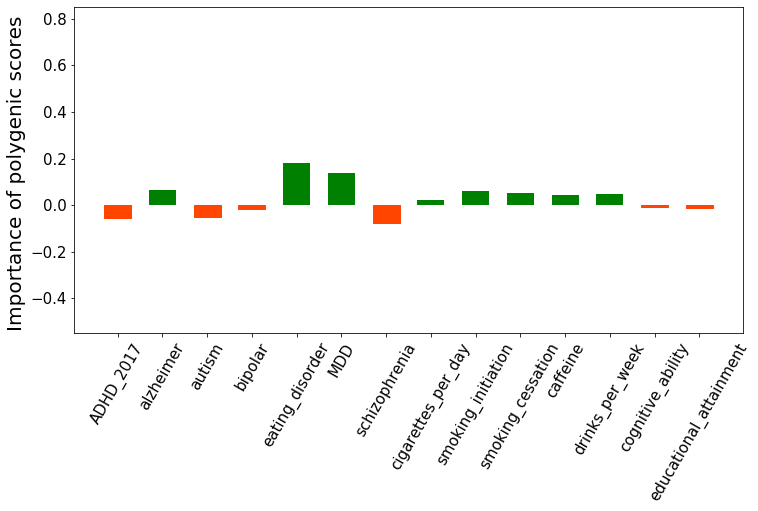

In [40]:
import matplotlib.pyplot as plt
component = 4
ss = selected_sum/n_times
PRS_names = final_PRSs.columns.values[1:]
fig = plt.figure(figsize = (12,6))
# ax = plt.bar(np.arange(len(ss[:,2])), height = abs(ss[:,component]), width = 0.6, align = 'center', color='green')
ax = plt.bar(np.arange(len(ss[:,2])), height = ss[:,component], width = 0.6, align = 'center', color='green')
# plt.xlabel('Polygenic scores',fontsize=20)
plt.ylabel('Importance of polygenic scores ',fontsize=20)
plt.xticks(np.arange(len(ss[:,0])),PRS_names,rotation=60)
plt.tick_params(labelsize=15)
plt.ylim((-0.55,0.85))
for i in range(14):
    if selected_sum[i,component] < 0:
        ax[i].set_color('orangered')
# ax[1].set_color('green')
# ax[8].set_color('green')
# ax[10].set_color('green')
# plt.axvline(x= 0, color='dimgrey', linewidth = 1)
fig.savefig('/data/sliu/updated_ukbb2/PLS_results_temp/genetic_weights_C5.png',dpi=300,bbox_inches = 'tight')
plt.show()

In [28]:
column_names = list(final_vols.columns.values[1:])
for i in range(210):
    column_names.append('FC'+str(i+1))
for i in range(21):
    column_names.append('ICV'+str(i+1))
    
wdata = pd.DataFrame(data=column_names,columns=['features'])
W = imaging_sum/n_times
for i in range(ncom):
    ss = 'weights'+str(i+1)
    wdata[ss] = W[:,i]
wdata.to_csv('/data/sliu/updated_ukbb2/PLS_results_temp/PLS_vols.and.FC_weights.csv',index=False)

In [29]:
wdata2 = pd.DataFrame(data=column_names,columns=['features'])
W = imaging_num/n_times
for i in range(ncom):
    ss = 'weights'+str(i+1)
    wdata2[ss] = W[:,i]
wdata2.to_csv('/data/sliu/updated_ukbb2/PLS_results_temp/PLS_vols.and.FC_weights2.csv',index=False)

In [30]:
wdata3 = pd.DataFrame(data=column_names,columns=['features'])
W = imaging_num/n_times
for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        if W[i,j] < 0.5:
            W[i,j] = 0
for i in range(ncom):
    ss = 'weights'+str(i+1)
    wdata3[ss] = W[:,i]
wdata3.to_csv('/data/sliu/updated_ukbb2/PLS_results_temp/PLS_vols.and.FC_weights3.csv',index=False)